# 1.0 Library

In [1]:
# required libraries for data explore and data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
# required libraries for training
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix , classification_report
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

2023-09-14 21:48:37.111422: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-14 21:48:37.348963: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-14 21:48:37.350042: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-14 21:48:38.050736: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# 2.0 Data explore

In [2]:
df = pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


# 3.0 Data Visualisation

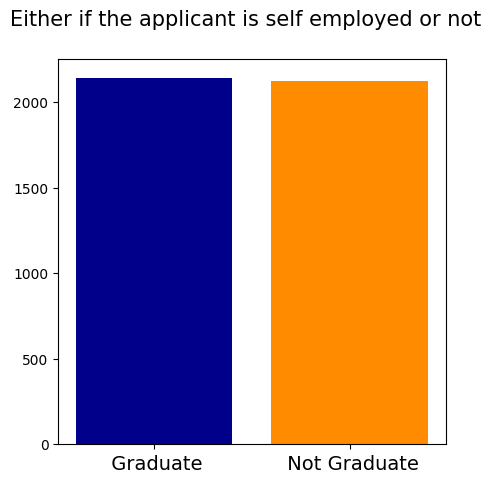

In [6]:
fig, ax = plt.subplots(1, figsize=(5,5))
plt.suptitle('Either if the applicant is self employed or not', fontsize=15)
ax.bar(df[' education'].value_counts().index, 
       df[' education'].value_counts().values,
       color = ['darkblue', 'darkorange'])
ax.set_xticks(range(0, 2))
ax.set_xticklabels([' Graduate',' Not Graduate'], fontsize = 14);

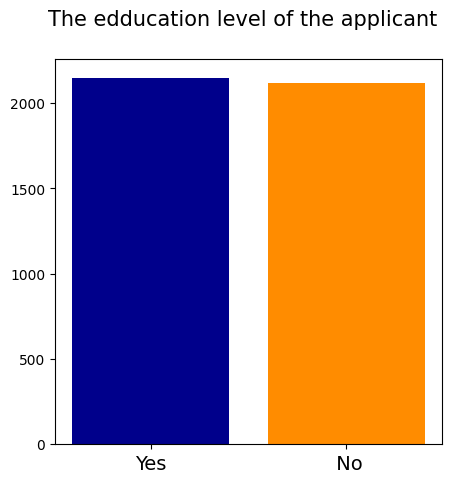

In [7]:
fig, ax = plt.subplots(1, figsize=(5,5))
plt.suptitle('The edducation level of the applicant', fontsize=15)
ax.bar(df[' self_employed'].value_counts().index, 
       df[' self_employed'].value_counts().values,
       color = ['darkblue', 'darkorange'])

ax.set_xticks(range(0, 2))
ax.set_xticklabels(['Yes',' No'], fontsize = 14);

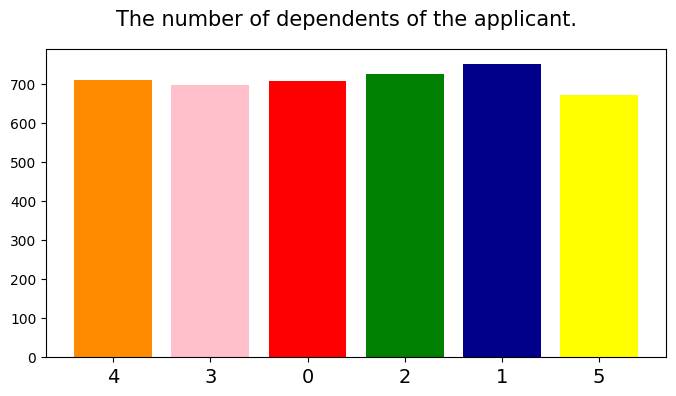

In [8]:
fig, ax = plt.subplots(1, figsize=(8,4))
plt.suptitle('The number of dependents of the applicant.', fontsize=15)
ax.bar(df[' no_of_dependents'].value_counts().index, 
       df[' no_of_dependents'].value_counts().values,
       color = ['darkblue','green' ,'darkorange','red','pink','yellow'])
cl_names = [name for name in df[' no_of_dependents'].value_counts().index]
ax.set_xticks(range(0, len(df[' no_of_dependents'].unique())))
ax.set_xticklabels(cl_names, fontsize = 14);

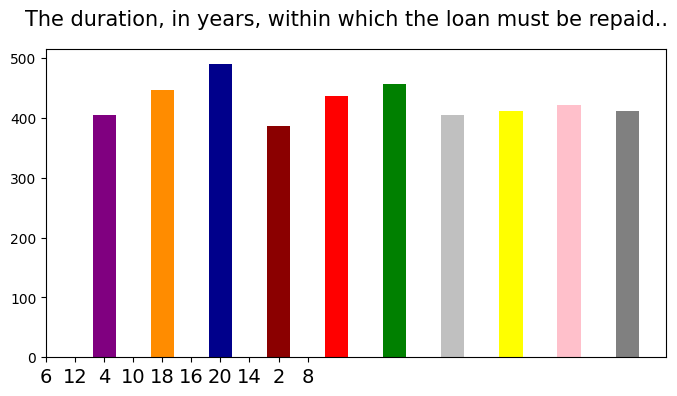

In [9]:
fig, ax = plt.subplots(1, figsize=(8,4))
plt.suptitle('The duration, in years, within which the loan must be repaid..', fontsize=15)
ax.bar(df[' loan_term'].value_counts().index, 
       df[' loan_term'].value_counts().values,
       color = ['darkblue','green' ,'darkorange','red','pink','yellow','gray','silver','purple','darkred'])
cl_names = [name for name in df[' loan_term'].value_counts().index]
ax.set_xticks(range(0, len(df[' loan_term'].unique())))
ax.set_xticklabels(cl_names, fontsize = 14);

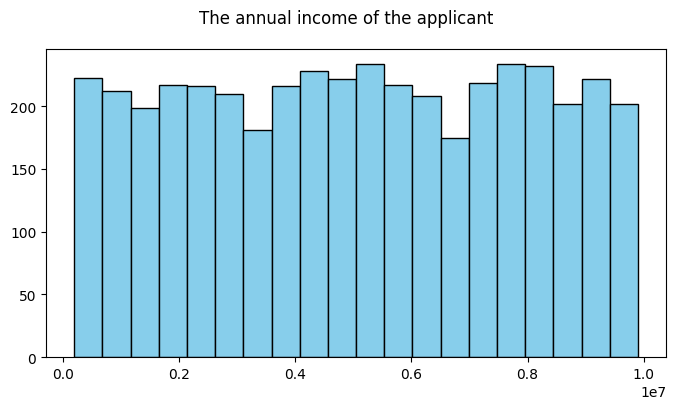

In [10]:
plt.figure(figsize=(8, 4))
plt.suptitle("The annual income of the applicant")
plt.hist(df[" income_annum"], bins=20, color='skyblue', edgecolor='black')
plt.show()

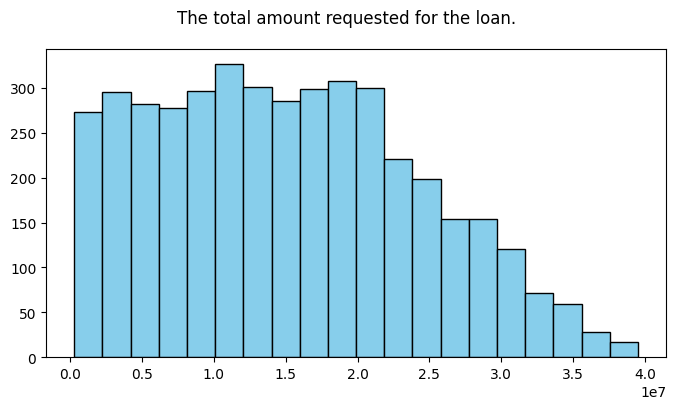

In [11]:
plt.figure(figsize=(8, 4))
plt.suptitle("The total amount requested for the loan.")
plt.hist(df[" loan_amount"], bins=20, color='skyblue', edgecolor='black')
plt.show()

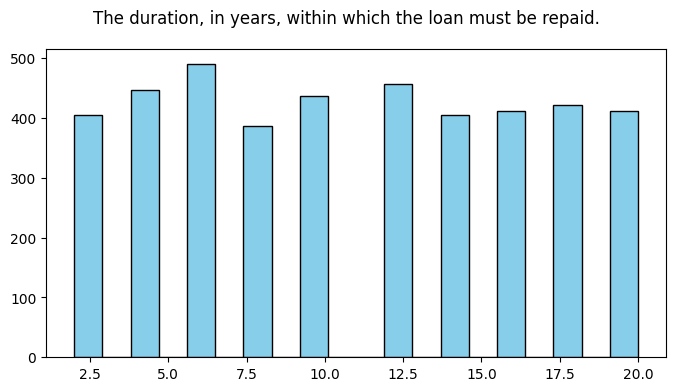

In [12]:
plt.figure(figsize=(8, 4))
plt.suptitle("The duration, in years, within which the loan must be repaid.")
plt.hist(df[" loan_term"], bins=20, color='skyblue', edgecolor='black')
plt.show()

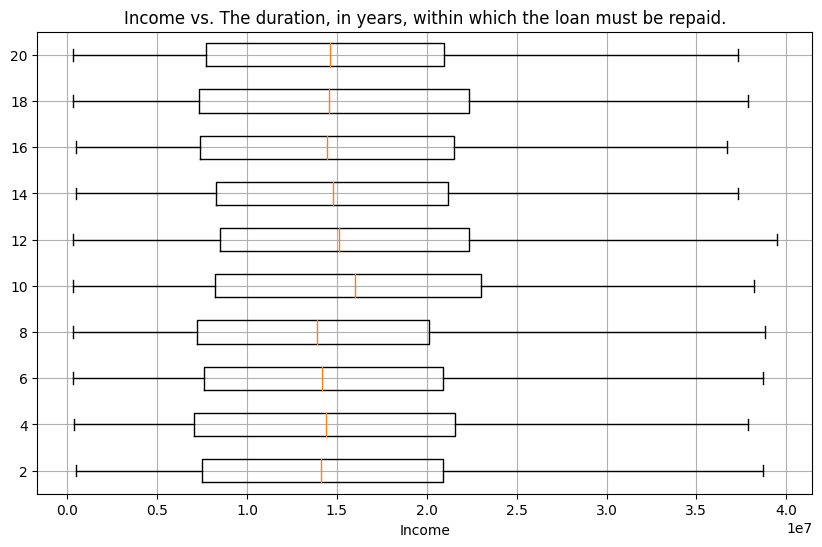

In [13]:
trem = df[' loan_term']
income = df[' loan_amount']
data = {}
for i in range(len(trem)):
    if trem[i] not in data:
        data[trem[i]] = []
    data[trem[i]].append(income[i])

# Create a list of income grouped by experience
grouped_income = [data[exp] for exp in sorted(data.keys())]

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(grouped_income, vert=False)
plt.title('Income vs. The duration, in years, within which the loan must be repaid.')
plt.xlabel('Income')
plt.yticks(range(1, len(grouped_income) + 1), sorted(data.keys()))
plt.grid(True)


plt.show()

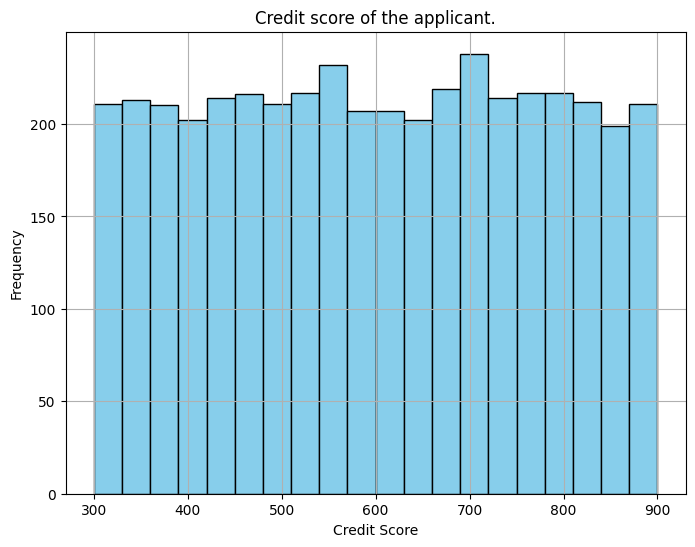

In [14]:
plt.figure(figsize=(8, 6))
plt.hist(df[' cibil_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Credit score of the applicant.')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.grid(True)

In [15]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

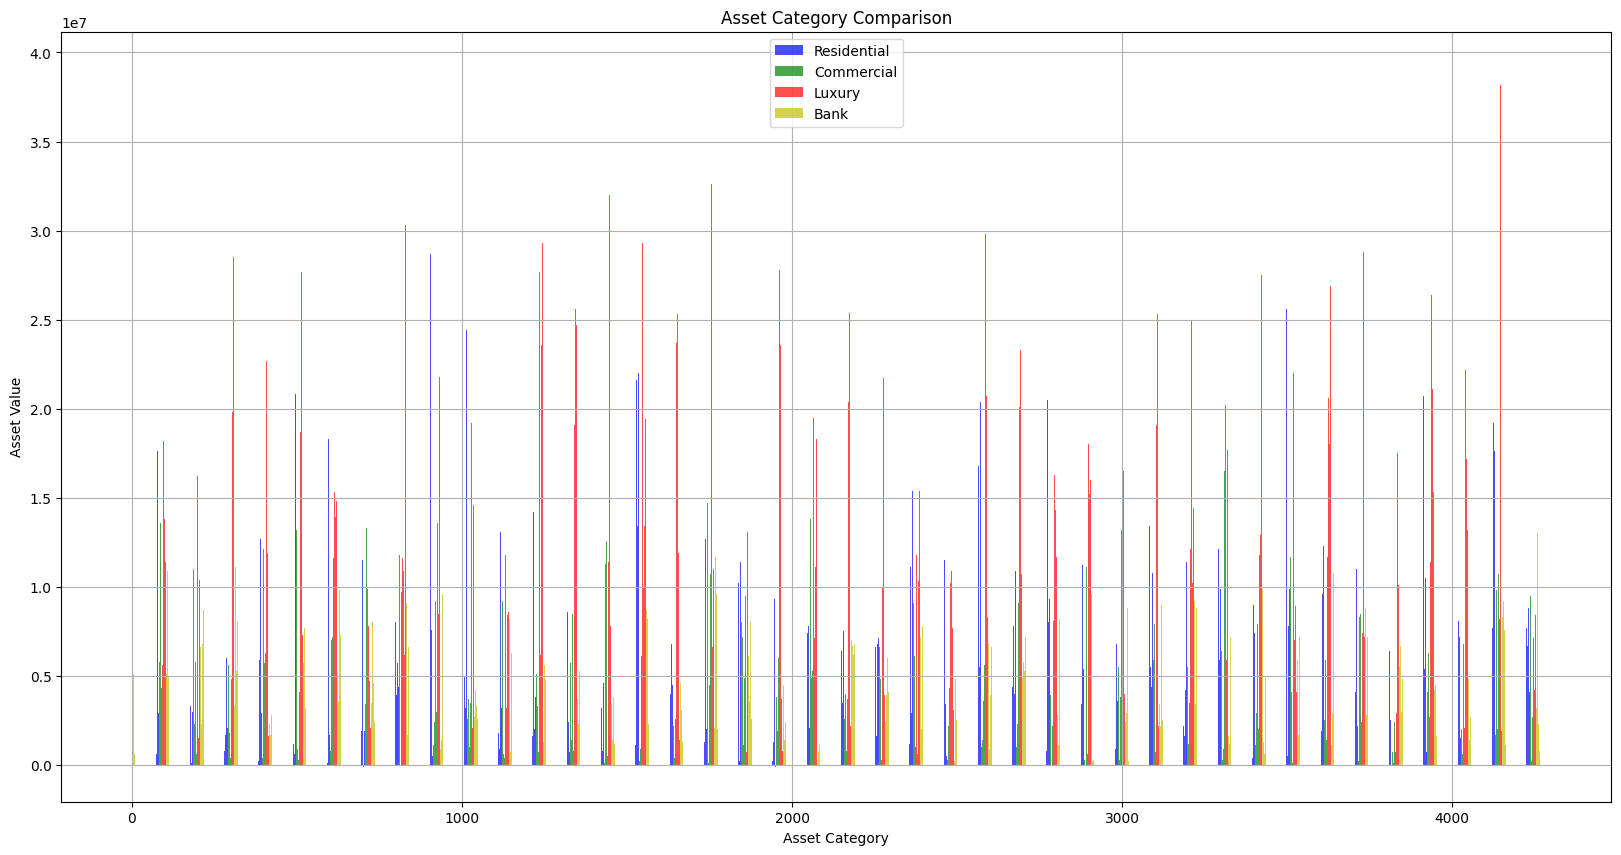

In [16]:
# Sample data 
residential_assets_value = df[' residential_assets_value']
commercial_assets_value = df[' commercial_assets_value']
luxury_assets_value = df[' luxury_assets_value']
bank_assets_value = df[' bank_asset_value']
# Create an array of indices for the data points
indices = np.arange(len(residential_assets_value))

bar_width = 0.1

# Create the bar plot
plt.figure(figsize=(20, 10))
plt.bar(indices - bar_width, residential_assets_value, bar_width, label='Residential', color='b', alpha=0.7)
plt.bar(indices, commercial_assets_value, bar_width, label='Commercial', color='g', alpha=0.7)
plt.bar(indices + bar_width, luxury_assets_value, bar_width, label='Luxury', color='r', alpha=0.7)
plt.bar(indices + 2 * bar_width, bank_assets_value, bar_width, label='Bank', color='y', alpha=0.7)


plt.title('Asset Category Comparison')
plt.xlabel('Asset Category')
plt.ylabel('Asset Value')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


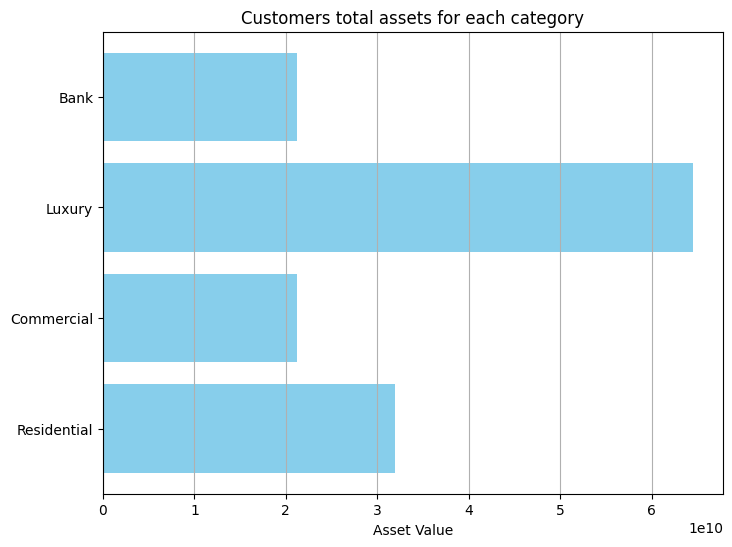

In [17]:
categories = ['Residential', 'Commercial', 'Luxury', 'Bank']
asset_values = [sum(df[' residential_assets_value']), sum(df[' commercial_assets_value']), sum(df[' luxury_assets_value']), sum(df[' bank_asset_value'])]  

# Create an array of indices for the data points
indices = np.arange(len(categories))

# Create the horizontal bar plot
plt.figure(figsize=(8, 6))
plt.barh(indices, asset_values, color='skyblue')
plt.yticks(indices, categories)
plt.xlabel('Asset Value')
plt.title('Customers total assets for each category')
plt.grid(axis='x')

# Show the plot
plt.show()


In [18]:
df[' loan_status'].value_counts()

 loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64

We have inbalance data so for training we need to make some actions

# 4.0 Training

# 4.1 Data preparation for training

In [19]:
columns = []
difference_max_min = []

for col in df.columns:
    max_val = df[col].max()
    min_val = df[col].min()
    try:
        difference = max_val - min_val
        difference_max_min.append(difference)
        columns.append(col)
    except:
        pass
data = {'columns': columns, 'difference_max_min': difference_max_min}
my_df = pd.DataFrame(data)
my_df.head()

,columns,difference_max_min
0,loan_id,4268
1,no_of_dependents,5
2,income_annum,9700000
3,loan_amount,39200000
4,loan_term,18


### Its clear that income,loan amount have to big differance so during training it will affect our score so prevent it I will use log function 

In [20]:
income_annum_log = []
loan_amount_log = []

for m in df[' income_annum']:
    income_annum_log.append(math.log(m))
 
for m in df[' loan_amount']:
    loan_amount_log.append(math.log(m))

In [21]:
df['income_annum_log']  = income_annum_log
df['loan_amount_log']  = loan_amount_log

In [22]:
#lets drop not usefull data

df1 = df.drop(['loan_id',' income_annum',' loan_amount'],axis=1)

In [23]:
#now replace education and sef empoyed status with 0 and 1 (we cant use str during training)
df1['education_0_1'] = df1[' education'].replace({' Graduate': 0, ' Not Graduate': 1})
df1['self_employed_0_1'] = df1[' self_employed'].replace({' Yes': 0, ' No': 1})
df1[' loan_status'] = df1[' loan_status'].replace({' Approved': 0, ' Rejected': 1})

In [24]:
#now we will drop education and self empoyed 
df2 = df1.drop([' education',' self_employed'],axis=1)

In [25]:
df3 = df2.copy()
max_numbers = []
cloumn_name = []

for each_col in df3.columns:
    max_numbers.append(df3[each_col].max())
    cloumn_name.append(each_col)
    df3[each_col] = df3[each_col]/df3[each_col].max()

In [26]:
X = df3.drop(" loan_status",axis=1)
Y = df3[' loan_status']

In [27]:
Y.value_counts().index

Index([0.0, 1.0], dtype='float64', name=' loan_status')

In [28]:
#Lets handle our inbalance data approved value is 

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, Y)

y_resampled.value_counts()

 loan_status
0.0    2656
1.0    2656
Name: count, dtype: int64

In [29]:
#lets devide data 2 part and we will use 80% of data for training
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=15, stratify=y_resampled)

In [30]:
model = keras.Sequential([
    layers.Input(shape=(11,)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification output
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(X_test, y_test))


Epoch 1/100


2023-09-14 21:49:00.447165: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-14 21:49:00.448360: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


67/67 [==============================] - 1s 3ms/step - loss: 0.6699 - accuracy: 0.5815 - val_loss: 0.5691 - val_accuracy: 0.8438
Epoch 2/100
67/67 [==============================] - 0s 2ms/step - loss: 0.4719 - accuracy: 0.7830 - val_loss: 0.2730 - val_accuracy: 0.8993
Epoch 3/100
67/67 [==============================] - 0s 2ms/step - loss: 0.3257 - accuracy: 0.8649 - val_loss: 0.2304 - val_accuracy: 0.9097
Epoch 4/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2770 - accuracy: 0.8934 - val_loss: 0.2308 - val_accuracy: 0.9125
Epoch 5/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2491 - accuracy: 0.9049 - val_loss: 0.2168 - val_accuracy: 0.9153
Epoch 6/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2407 - accuracy: 0.9094 - val_loss: 0.2092 - val_accuracy: 0.9172
Epoch 7/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2256 - accuracy: 0.9150 - val_loss: 0.2031 - val_accuracy: 0.9219
Epoch 8/100
67/67 [======

Epoch 59/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1159 - accuracy: 0.9463 - val_loss: 0.1149 - val_accuracy: 0.9483
Epoch 60/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1159 - accuracy: 0.9463 - val_loss: 0.1120 - val_accuracy: 0.9473
Epoch 61/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1206 - accuracy: 0.9463 - val_loss: 0.1156 - val_accuracy: 0.9426
Epoch 62/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1179 - accuracy: 0.9456 - val_loss: 0.1252 - val_accuracy: 0.9389
Epoch 63/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1265 - accuracy: 0.9454 - val_loss: 0.1200 - val_accuracy: 0.9417
Epoch 64/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1299 - accuracy: 0.9447 - val_loss: 0.1160 - val_accuracy: 0.9445
Epoch 65/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1246 - accuracy: 0.9442 - val_loss: 0.1213 - val_accuracy: 0.9379
Epoch 

In [31]:
y_preds = model.predict(X_test)
y_preds = np.round(y_preds)
print("Classification Report: \n", classification_report(y_test, y_preds))

34/34 [==============================] - 0s 661us/step
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       532
         1.0       0.93      0.96      0.94       531

    accuracy                           0.94      1063
   macro avg       0.94      0.94      0.94      1063
weighted avg       0.94      0.94      0.94      1063



In [32]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}


In [33]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_resampled, y_resampled)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_result = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_result

,model,best_score,best_params
0,svm,0.942583,"{'C': 10, 'kernel': 'rbf'}"
1,random_forest,0.979293,{'n_estimators': 10}
2,logistic_regression,0.929783,{'C': 10}


In [43]:
import pickle
with open('random_forest_model.pkl', 'rb') as file:
    random_forest_model_1 = pickle.load(file)

In [54]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,4259,4260,4261,4262,4263,4264,4265,4266,4267,4268
loan_id,1,2,3,4,5,6,7,8,9,10,...,4260,4261,4262,4263,4264,4265,4266,4267,4268,4269
no_of_dependents,2,0,3,3,5,0,5,2,0,5,...,0,5,3,5,3,5,0,2,1,1
education,Graduate,Not Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,Graduate,Not Graduate,...,Not Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Not Graduate,Not Graduate,Not Graduate,Graduate
self_employed,No,Yes,No,No,Yes,Yes,No,Yes,Yes,No,...,Yes,No,Yes,No,No,Yes,Yes,No,No,No
income_annum,9600000,4100000,9100000,8200000,9800000,4800000,8700000,5700000,800000,1100000,...,4500000,8800000,3000000,1300000,5000000,1000000,3300000,6500000,4100000,9200000
loan_amount,29900000,12200000,29700000,30700000,24200000,13500000,33000000,15000000,2200000,4300000,...,11500000,29300000,7500000,3000000,12700000,2300000,11300000,23900000,12800000,29700000
loan_term,12,8,20,8,20,10,4,20,20,10,...,14,10,6,20,14,12,20,18,8,10
cibil_score,778,417,506,467,382,319,678,382,782,388,...,509,560,881,540,865,317,559,457,780,607
residential_assets_value,2400000,2700000,7100000,18200000,12400000,6800000,22500000,13200000,1300000,3200000,...,13400000,16800000,1400000,1000000,4700000,2800000,4200000,1200000,8200000,17800000
commercial_assets_value,17600000,2200000,4500000,3300000,8200000,8300000,14800000,5700000,800000,1400000,...,2300000,13900000,4500000,2300000,8100000,500000,2900000,12400000,700000,11800000


In [44]:
random_forest_model_1.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [37]:
model_random_forest = RandomForestClassifier(n_estimators=10)
model_random_forest.fit(X_resampled,y_resampled)

RandomForestClassifier(n_estimators=10)

In [40]:
y_pred = model_random_forest.predict(X_test)
y_preds = np.round(y_preds)
print("Classification Report: \n", classification_report(y_test, y_preds))

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.97      0.92      0.94       532
         1.0       0.92      0.97      0.94       531

    accuracy                           0.94      1063
   macro avg       0.94      0.94      0.94      1063
weighted avg       0.94      0.94      0.94      1063



In [42]:
import pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model_random_forest, file)

In [44]:
with open('max_numbers.pkl', 'wb') as file:
    pickle.dump(max_numbers, file)

with open('cloumn_name.pkl', 'wb') as file:
    pickle.dump(cloumn_name, file)